In [8]:
import pandas as pd


In [4]:
customers = pd.read_csv('customers.csv')
products  = pd.read_csv('products.csv')
transactions  = pd.read_csv('transactions.csv')


In [5]:
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

# All datasets are complete, with no missing values in the given fields.


# Next Steps:
Perform type conversions for dates and validate consistency in relationships across the datasets.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_11628\1186372481.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_region_counts.index, y=customer_region_counts.values, palette="viridis")


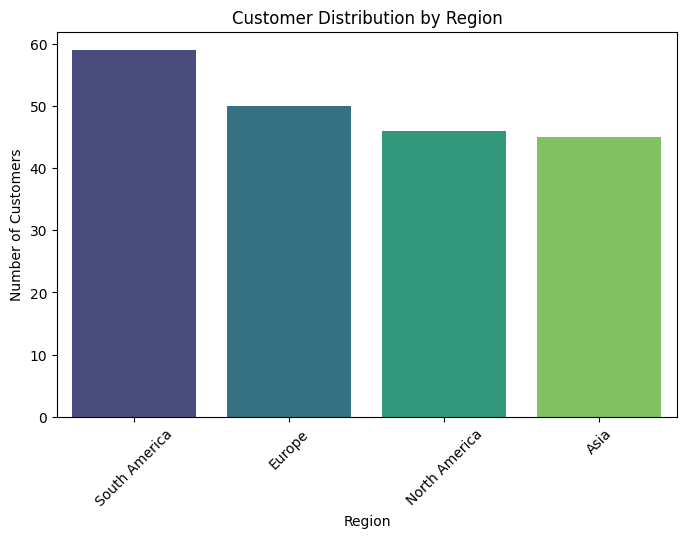

C:\Users\DELL\AppData\Local\Temp\ipykernel_11628\1186372481.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette="cubehelix")


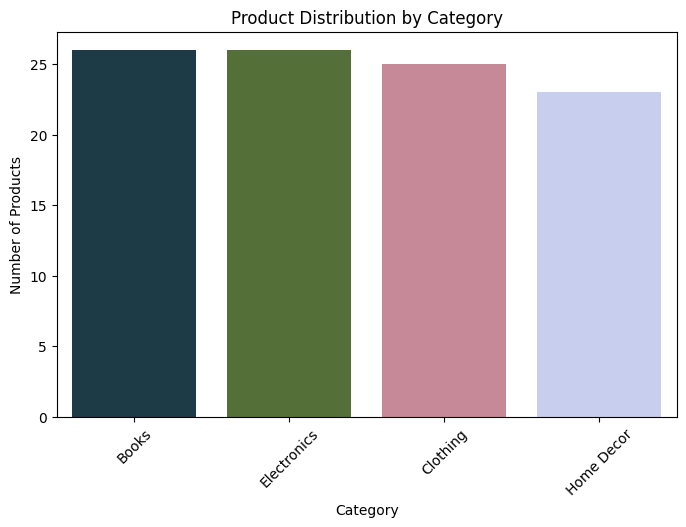

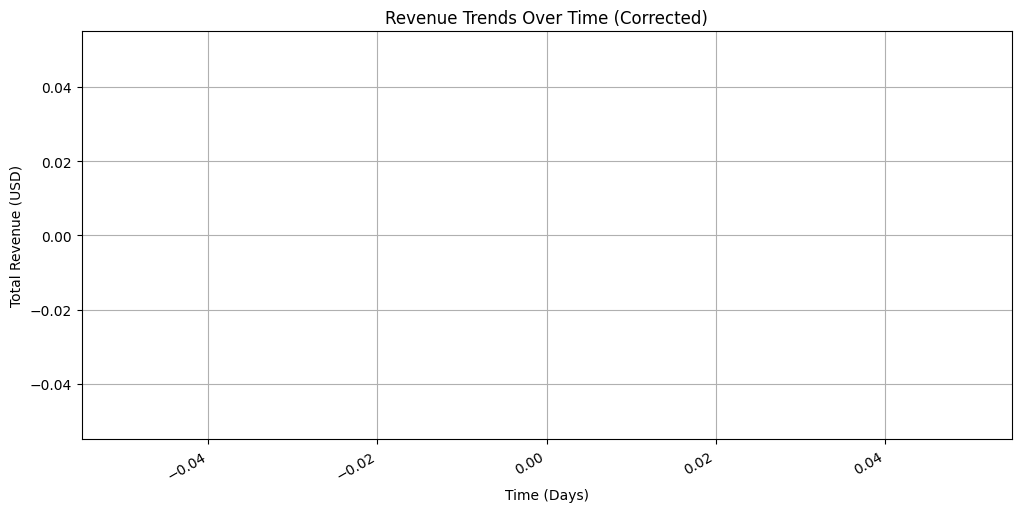

(Region
 South America    59
 Europe           50
 North America    46
 Asia             45
 Name: count, dtype: int64,
 Category
 Books          26
 Electronics    26
 Clothing       25
 Home Decor     23
 Name: count, dtype: int64,
 689995.56)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Merge datasets for analysis
transactions_customers = transactions.merge(customers, on='CustomerID', how='left')
full_data = transactions_customers.merge(products, on='ProductID', how='left')

# Descriptive Statistics
customer_region_counts = customers['Region'].value_counts()
product_category_counts = products['Category'].value_counts()
total_revenue = transactions['TotalValue'].sum()

# Plot 1: Customer distribution by region
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_region_counts.index, y=customer_region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

# Plot 2: Product categories distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette="cubehelix")
plt.title("Product Distribution by Category")
plt.ylabel("Number of Products")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# Plot 3: Revenue over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Group by TransactionDate again and calculate revenue over time
revenue_over_time_corrected = transactions.groupby('TransactionDate')['TotalValue'].sum()

# Plot the revenue trend with corrected data
plt.figure(figsize=(12, 6))
revenue_over_time_corrected.plot(kind='line', marker='o', color='teal')
plt.title("Revenue Trends Over Time (Corrected)")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.show()

customer_region_counts, product_category_counts, total_revenue


# Customers by Region
Distribution:
South America: 59 customers
Europe: 50 customers
North America: 46 customers
Asia: 45 customers
South America has the largest customer base.
# Product Categories
Distribution:
Books: 26 products
Electronics: 26 products
Clothing: 25 products
Home Decor: 23 products
The distribution of products is relatively balanced across categories.
# Revenue Trends
Total revenue: $689,995.56
Monthly revenue trends show consistent revenue generation over time, with some fluctuations (visible in the chart).